In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

\begin{equation}
c_0 x^2 +c_1 xy + c_2 y^2 + c_3 x + c_4 y - z + c_5 = 0 \\
F = c_0 + c_1 x + c_2 y  + c_3 xy+ c_4 x^2 + c_5 y^2 -z = 0 \\
\nabla F =
\begin{pmatrix}
c_1 + c_3y + 2c_4x\\
c_2 + c_3x + 2c_5y\\
-1
\end{pmatrix}
\end{equation}

In [2]:
from lib.fault import *

In [3]:
fault_surfaces_points = pd.read_csv("fault_surfaces_points.csv")

In [4]:
fault_surfaces_points_grouped = fault_surfaces_points.groupby('Fault')

faults = [Fault(idx,f[['X','Y','Z']].to_numpy(), 1) for idx, f in fault_surfaces_points_grouped]

# for _, fault in fault_surfaces_points_grouped:
#     data.append(go.Mesh3d(x=fault['X'], 
#                            y=fault['Y'], 
#                            z=fault['Z'],
#                            alphahull=-1,
#                           opacity=1
#                     ))
    
# fig = go.Figure(data=data[::1])

# fig.show()

In [5]:
faults = process_faults(faults)
df_faults = generate_table(faults)

In [6]:
df_faults.head()

strike       dip    depth_min    depth_max       height        length  \
0  4.320980  0.578199 -3855.983296 -4242.613502  4706.926988  13898.696435   
1  2.236016  0.490603 -4854.006668 -5004.536237  4034.125551   3828.123437   
2  1.821551  0.465284 -2652.978340 -3617.215649  6351.965159  20684.441929   
3  3.035495  0.706882 -3416.414888 -3503.291378  2229.510838   1960.209198   
4  2.724955  0.740406 -1363.503760 -1384.716577  1252.292091   2265.914173   

           area      curv  curv_mean  curv_min  curv_max    curv_x    curv_y  
0  5.570550e+07 -0.000030  -0.000029 -0.000030 -0.000029 -0.000061  0.000002  
1  8.709254e+06 -0.000013  -0.000013 -0.000014 -0.000013 -0.000021 -0.000006  
2  1.079439e+08 -0.000007  -0.000007 -0.000007 -0.000007 -0.000004 -0.000010  
3  2.456831e+06  0.000066   0.000065  0.000064  0.000066  0.000015  0.000117  
4  1.792160e+06 -0.000033  -0.000033 -0.000033 -0.000033 -0.000045 -0.000021

In [7]:
import matplotlib.pyplot as plt 

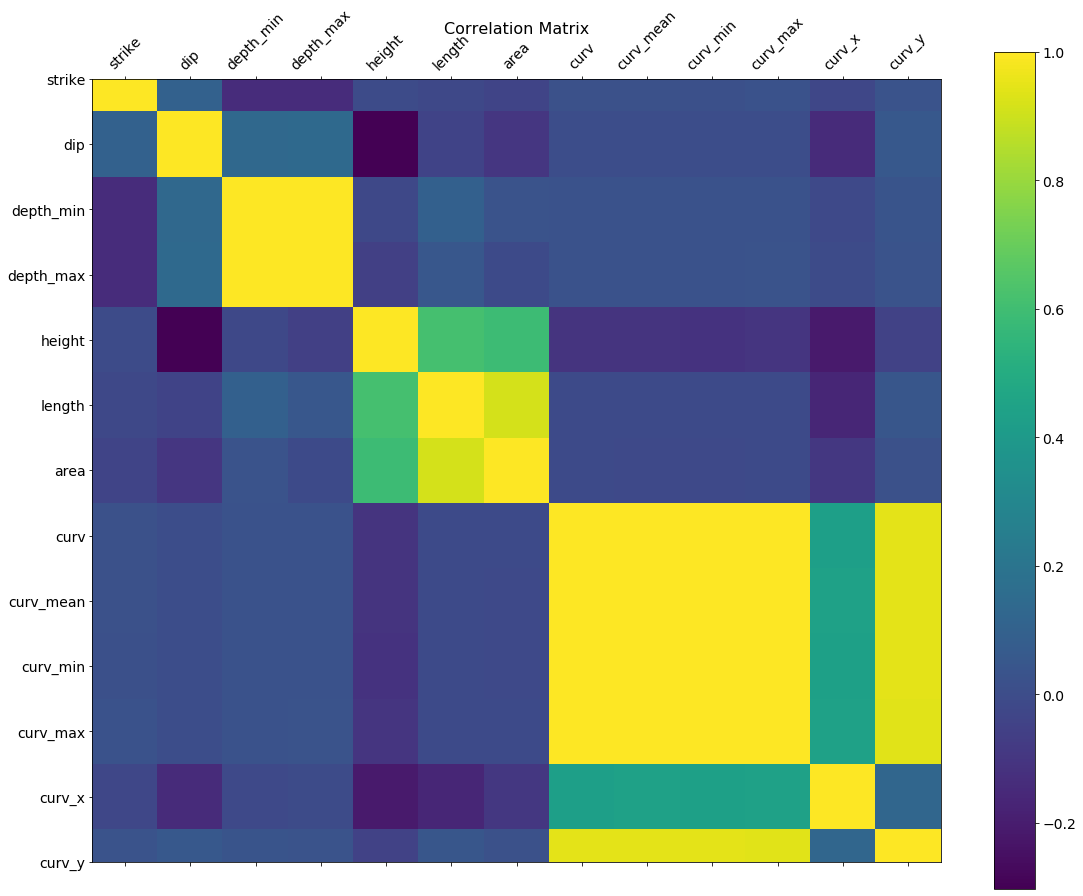

In [68]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_faults.corr(), fignum=f.number)
plt.xticks(range(df_faults.shape[1]), df_faults.columns, fontsize=14, rotation=45)
plt.yticks(range(df_faults.shape[1]), df_faults.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [8]:
# plt.hist(df_faults['curv_mean'],bins=100,alpha=0.35)
# plt.hist(df_faults['curv'],bins=100,alpha=0.35)
# plt.hist(df_faults['curv_mean']-df_faults['curv'],bins=100,alpha=0.35)
# plt.hist(df_faults['curv_min'],bins=100,alpha=0.35)
# plt.hist(df_faults['curv_max'],bins=100,alpha=0.35)
plt.show()

In [65]:
plt.scatter(df_faults['strike'], df_faults['dip'], c=y_pred)

(-0.0002, 0.0002)

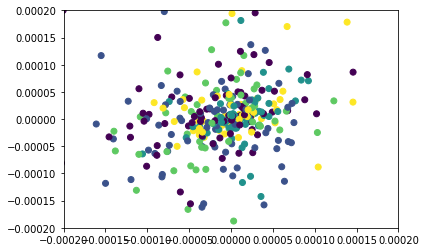

In [64]:
plt.scatter(df_faults['curv_x'], df_faults['curv_y'], c=y_pred)
plt.xlim([-0.0002, 0.0002])
plt.ylim([-0.0002, 0.0002])

In [11]:
plt.scatter(df_faults['strike'], df_faults['dip'], c=y_pred)

NameError: name 'y_pred' is not defined

In [12]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaler.fit(df_faults[['dip','depth_min', 'height', 'length', 'area', 'curv']])
data = scaler.transform(df_faults[['dip','depth_min', 'height', 'length','area', 'curv']])

In [59]:
from sklearn.cluster import KMeans, DBSCAN

random_state = 170

# y_pred = DBSCAN(eps=1.25, min_samples=2).fit_predict(data)

y_pred = KMeans(n_clusters=5, random_state=random_state).fit_predict(Y)


In [60]:
y_pred

array([1, 1, 1, 3, 4, 4, 3, 1, 1, 3, 3, 3, 3, 4, 4, 0, 1, 4, 2, 4, 3, 3,
       2, 4, 1, 1, 3, 1, 4, 4, 3, 4, 3, 1, 4, 4, 2, 4, 3, 0, 0, 1, 0, 4,
       2, 1, 4, 4, 2, 3, 2, 4, 4, 2, 3, 2, 1, 2, 3, 2, 3, 2, 1, 2, 0, 4,
       1, 4, 4, 2, 0, 2, 4, 4, 2, 4, 0, 1, 3, 2, 3, 2, 2, 4, 4, 2, 4, 3,
       3, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 1, 4, 2, 4, 4, 4, 4, 3, 2, 2, 2,
       4, 3, 0, 4, 4, 2, 2, 1, 3, 3, 4, 2, 4, 2, 4, 1, 4, 2, 4, 1, 1, 1,
       1, 1, 4, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 3, 4, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 2, 4, 2, 3, 0, 2, 3, 3, 2,
       0, 4, 3, 2, 2, 4, 0, 0, 0, 2, 0, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0,
       3, 1, 0, 1, 1, 3, 1, 3, 0, 3, 4, 1, 0, 1, 0, 0, 3, 2, 1, 3, 0, 1,
       0, 0, 3, 1, 1, 0, 1, 4, 0, 0, 3, 2, 1, 3, 0, 1, 3, 3, 0, 3, 3, 3,
       3, 2, 0, 4, 0, 2, 0, 0, 0, 3, 1, 1, 0, 4, 0, 3, 0, 3, 3, 1, 3, 0,
       1, 0, 3, 1, 1, 0, 1, 1, 1, 3, 1, 0, 4, 0, 0,

In [61]:
from sklearn import manifold


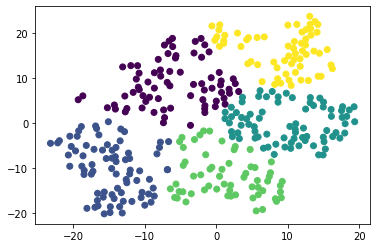

In [62]:
tsne = manifold.TSNE(n_components=2, perplexity=25,init='pca')
# tsne = manifold.SpectralEmbedding(n_components=2,
#                                    n_neighbors=10)
Y = tsne.fit_transform(data)
plt.scatter(Y[:, 0], Y[:, 1], c=y_pred)


In [63]:
fig = go.Figure(data=[
    go.Scatter3d(
        x=df_faults['depth_min']-df_faults['depth_max'], 
        y=df_faults['height'], 
        z=np.fabs(df_faults['length']),
        opacity=0.85,
        mode='markers',
    #     surfaceaxis=1,
        marker={
            'size': 2.5,
            'color': y_pred#df_faults['curv_mean']
        }
),
])
# df_faults[['depth_min', 'height', 'length', 'curv_mean']]
fig.show()


In [10]:
fault = faults[1]
fault.fit()
fault.compute_params()

fig = go.Figure(data=[
    go.Scatter3d(
        x= fault.data[:,0], 
        y= fault.data[:,1], 
        z=-fault.data[:,2],
        opacity=0.85,
        mode='markers',
    #     surfaceaxis=1,
        marker={
            'size': 2.5,
            'color': fault.data[:,2]
        }
),
    go.Scatter3d(
        x= fault.data_rot[:,0], 
        y= fault.data_rot[:,1], 
        z=-fault.data_rot[:,2],
        opacity=0.85,
        mode='markers',
    #     surfaceaxis=1,
        marker={
            'size': 2.5,
            'color': fault.data[:,2]
        }
),
])

fig.show()

In [11]:
fault.get_pd_row()

strike       dip   depth_min   depth_max       height       length  \
0 -0.338612 -0.819895 -2328.27585 -2409.51296  1227.690175  2885.566077   

           area  
0  2.247719e+06

In [12]:
fault.get_pd_row()

strike       dip   depth_min   depth_max       height       length  \
0 -0.338612 -0.819895 -2328.27585 -2409.51296  1227.690175  2885.566077   

           area  
0  2.247719e+06

In [13]:
# import plotly.graph_objects as go

# fault = faults[0]
# fault.fit()
# fault.compute_params()

# print(np.rad2deg(fault.dip))

# data = fault.data
# strike = fault.strike
# dip = fault.dip

# r_z = np.matrix([[math.cos(-strike), -math.sin(-strike), 0], 
#                  [math.sin(-strike), math.cos(-strike), 0], 
#                  [0, 0, 1]])
# r_y = np.matrix([[math.cos(-dip), 0, math.sin(-dip)], 
#                  [0, 1, 0],
#                  [-math.sin(-dip), 0, math.cos(-dip)]])
# # r_x = np.matrix([[1, 0, 0],
# #                  [0, math.cos(-dip), -math.sin(-dip)], 
# #                  [0, math.sin(-dip), math.cos(-dip)]])

# data_rot = np.zeros(data.shape)
# data_rot2 = np.zeros(data.shape)
# for i in range(len(data)):
#     data_rot[i:i+1] = ((r_z * data[i:i+1].T)).T
#     data_rot2[i:i+1] = (r_y*(r_z * data[i:i+1].T)).T

# fig = go.Figure(data=[
#     go.Scatter3d(
#         x= fault.data[:,0], 
#         y= fault.data[:,1], 
#         z= fault.data[:,2],
#         opacity=0.85,
#         mode='markers',
#     #     surfaceaxis=1,
#         marker={
#             'size': 2.5,
#             'color': fault.data[:,2]
#         }
# ),
#    go.Mesh3d(
#        x=fault.data[:,0], 
#        y=fault.data[:,1], 
#        z=fault.z_fit,
#        alphahull=-1,
#        opacity=0.35
#     ),
#     go.Scatter3d(
#         x= data_rot[:,0], 
#         y= data_rot[:,1], 
#         z= data_rot[:,2],
#         opacity=0.85,
#         mode='markers',
#     #     surfaceaxis=1,
#         marker={
#             'size': 2.5,
#             'color': 1#fault.data[:,2]
#         }
# ),
#     go.Scatter3d(
#         x= data_rot2[:,0], 
#         y= data_rot2[:,1], 
#         z= data_rot2[:,2],
#         opacity=0.85,
#         mode='markers',
#     #     surfaceaxis=1,
#         marker={
#             'size': 2.5,
#             'color': 2#fault.data[:,2]
#         }
# ),
# ])
# fig.update_layout(scene_aspectmode='data')

# fig.show()